# 카드 고객 데이터Credit Card customers

확인하고자 하는 내용 & 목표

- 카드사에서 이탈하는 고객들의 특성 탐색
- 이탈할 고객들을 예측하는 모델 훈련(이탈고객 16.07%)
- [데이터 출처](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)


## EDA 및 전처리 과정


### 데이터 feature

- CLIENTNUM: 클라이언트 번호. 계정을 보유한 고객의 고유 식별자
- Attrition_Flag: 내부 이벤트(고객 활동) 변수 - 계정이 폐쇄된 경우 1 그렇지 않으면 0
- Customer_Age: 인구통계학적 변수 - 고객의 연령(년)
- Gender: 인구통계학적 변수 - M=남성, F=여성
- Dependent_count: 인구통계학적 변수 - 부양가족 수
- Education_Level: 인구통계학적 변수 - 계좌 보유자의 학력(예: 고등학교, 대졸 등)
- Marital_Status: 인구통계학적 변수 - 기혼, 미혼, 이혼, 불명
- Income_Category: 인구통계학적 변수 - 계정 소유자의 연간 소득 범주(< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, 알 수 없음)
- Card_Category: 제품 변수 - 카드 유형(블루, 실버, 골드, 플래티넘)
- Months_on_book: 은행과의 관계기간
- Total_Relationship_Count: 총 번호 고객이 보유한 제품의
- Months_Inactive_12_mon: 지난 12개월 동안 비활성 개월 수
- Contacts_Count_12_mon: 지난 12개월 동안의 연락 수
- Credit_Limit: 신용 카드의 신용 한도
- Total_Revolving_Bal: 신용 카드의 총 리볼빙 잔액
- Avg_Open_To_Buy: 신용 한도 구매 가능(지난 12개월 평균)
- Total_Amt_Chng_Q4_Q1: 거래 금액의 변화(Q1 대비 Q4)
- Total_Trans_Amt: 총 거래 금액(지난 12개월)
- Total_Trans_Ct: 총 거래 건수(지난 12개월)
- Total_Ct_Chng_Q4_Q1: 거래 수의 변화(Q1 대비 Q4)
- Avg_Utilization_Ratio: 평균 카드 이용률


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

데이터 불러오기


In [6]:
df = pd.read_csv('BankChurners.csv')
df = df.iloc[:, :-2]  # 뒤에 열 두개는 의미 없는 열로 제거

# 두 feature의 값을 지시함수로 변경
df.Attrition_Flag = df.Attrition_Flag.replace(
    {'Existing Customer': 0, 'Attrited Customer': 1})
df.Gender = df.Gender.replace({'M': 0, 'F': 1})

In [7]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,0,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,1,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,0,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


데이터 결측치, 데이터 형 확인


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

중복값 확인


In [10]:
df[df.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


기초 통계값 확인


In [11]:
df.describe(exclude='object')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,0.529081,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,1.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


데이터 내 유니크값 개수 확인


In [12]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

패키지를 이용해 전체적으로 EDA


In [13]:
from pandas_profiling import ProfileReport

In [14]:
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

특이사항

- Attrition_Flag: 타겟값(이탈고객)이 16.07%를 차지한다.
- Months_on_book: 36달이 24.3%로 도드라진 값을 보인다.
- Credit_Limit: 34516이 오른쪽 끝에 위치한 값으면서 추세에 벗어나게 5%의 값을 보인다.
- Total_Revolving_Bal: 2517이 오른쪽 끝에 위치한 값으면서 추세에 벗어나게 5%의 값을 보인다.
- Avg_Open_To_Buy: 32000이상에서 이전과 다른 양상을 보이는 데이터 그룹이 보인다.


### feature간 상관관계 확인


히트맵으로 numeric feature간 상관관계 확인


<AxesSubplot:title={'center':'Person Correlation of Features'}>

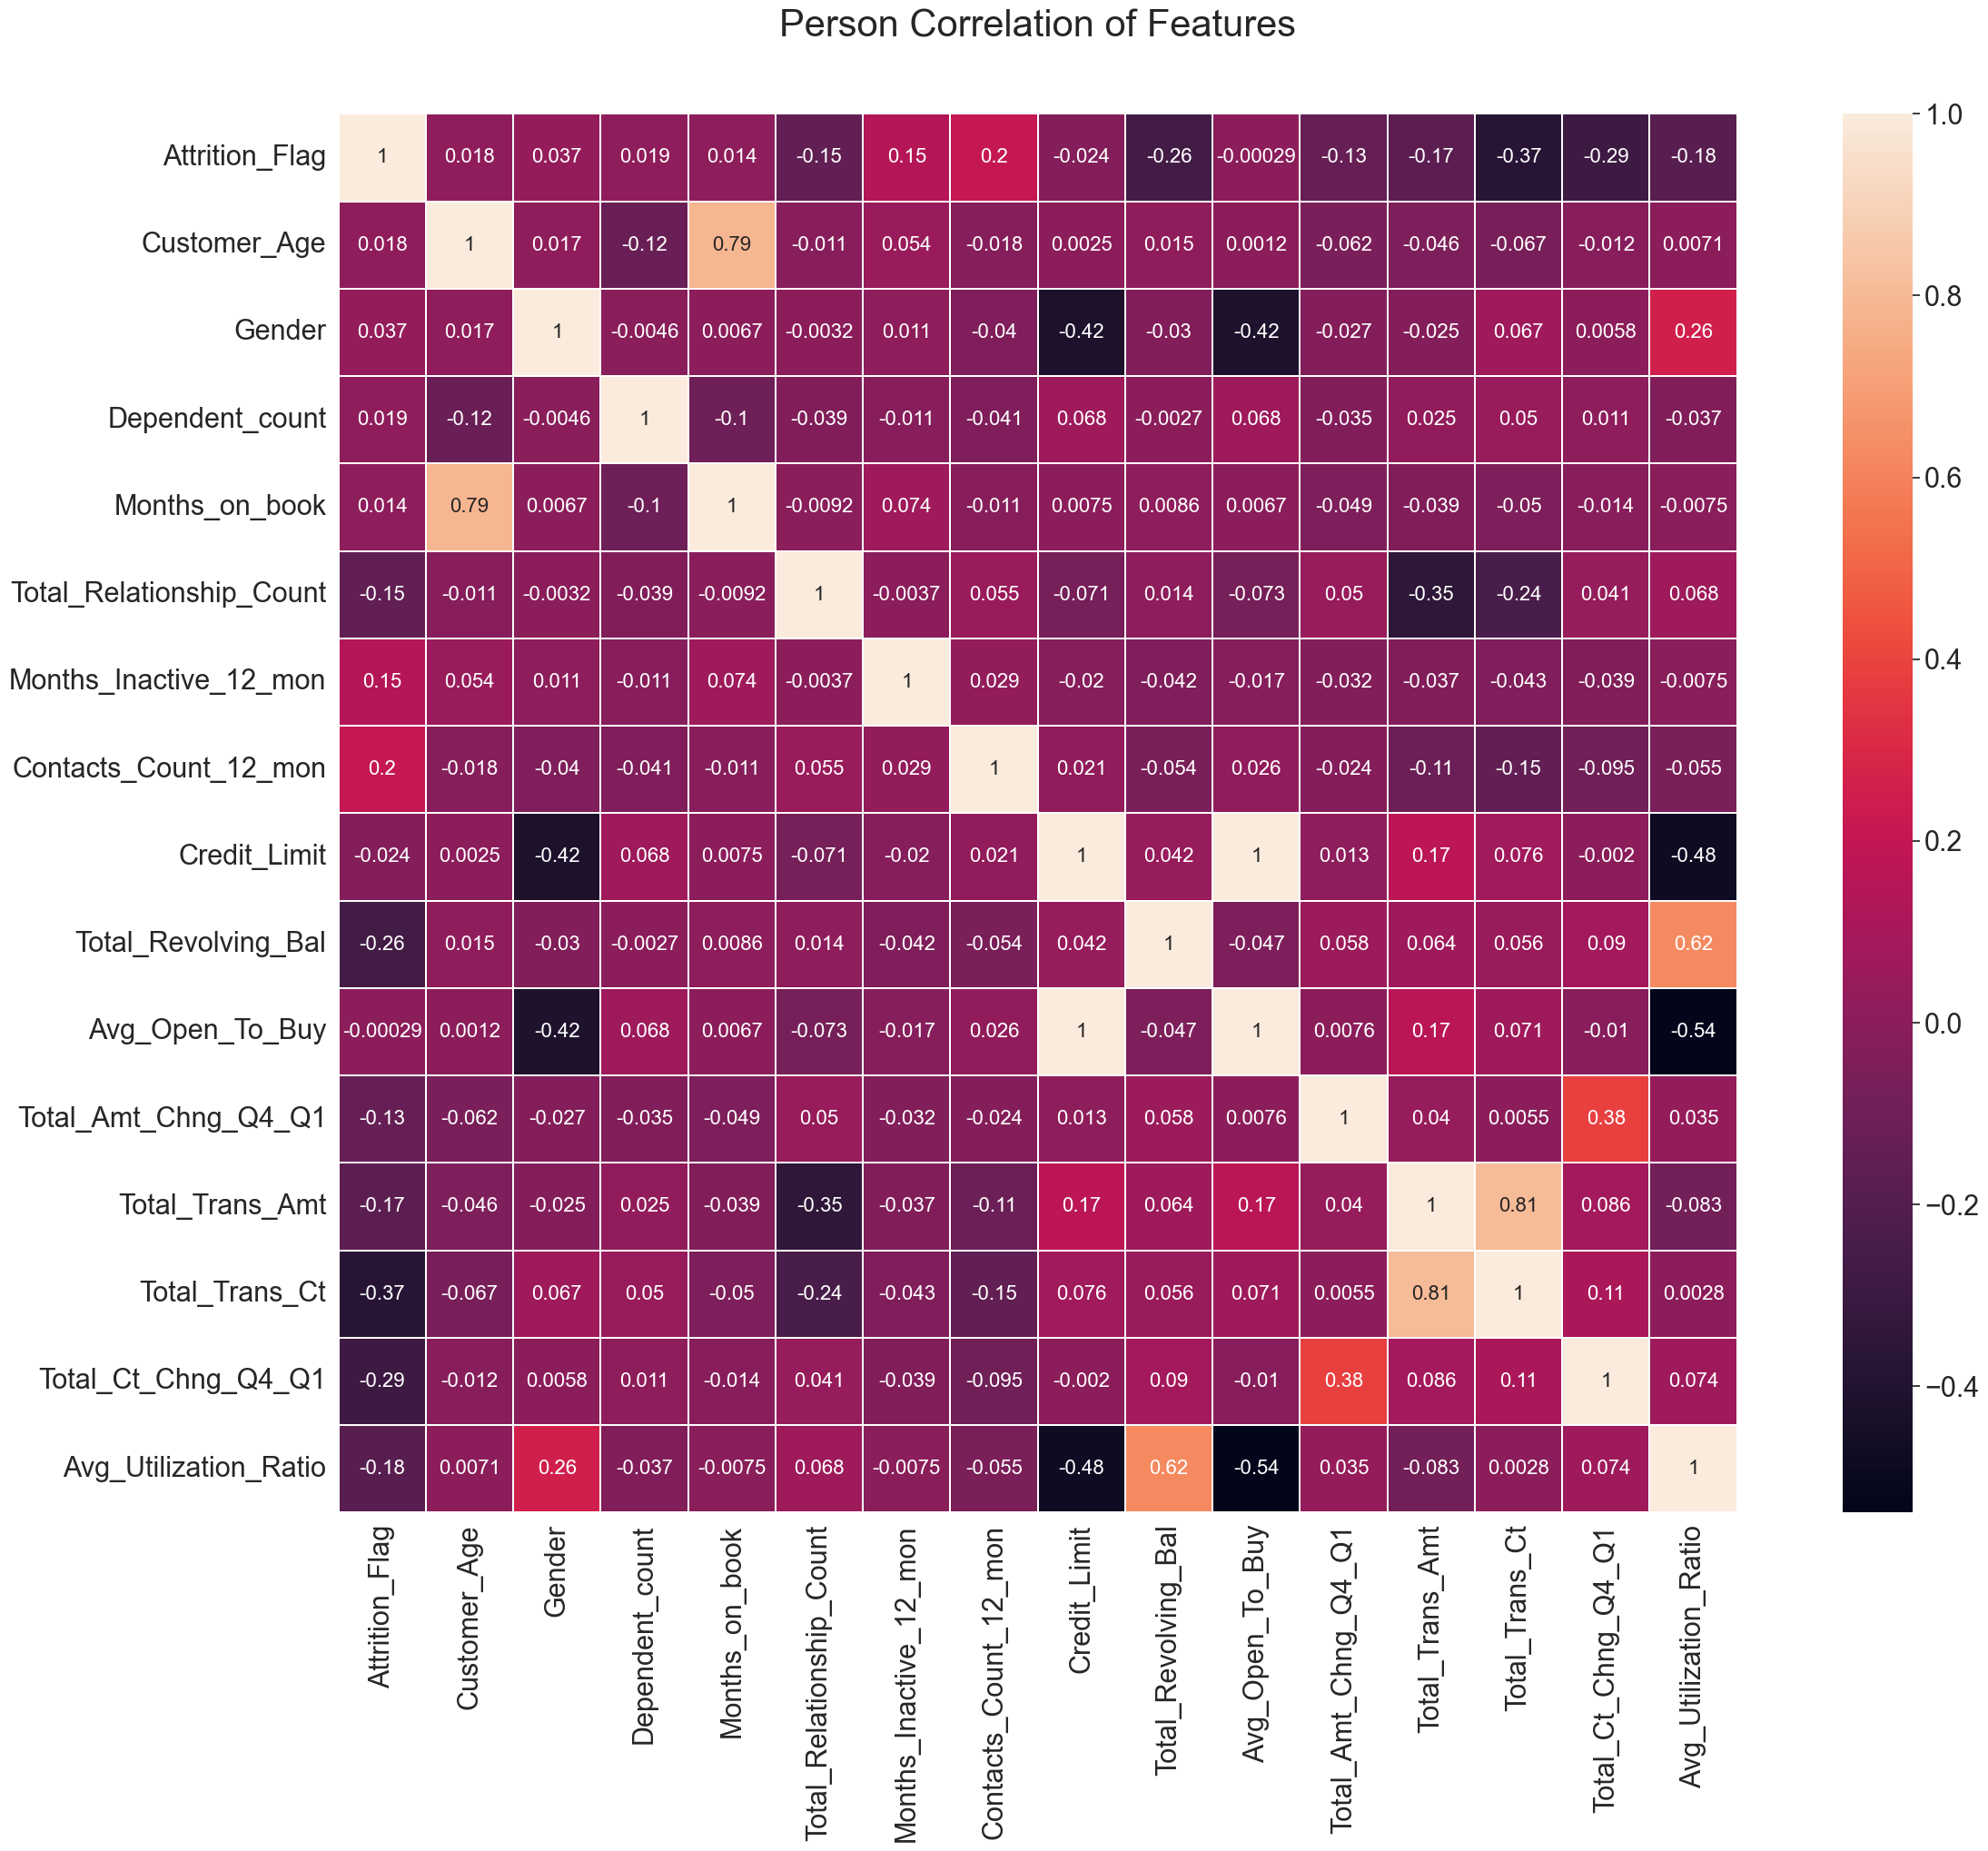

In [35]:
# 히트맵에 쓸 데이터
df_heat = df.select_dtypes(include='number').drop('CLIENTNUM', axis=1)

sns.set(font_scale = 2)
plt.figure(figsize=(30, 20))
plt.title("Person Correlation of Features", y=1.05, size=30)
sns.heatmap(df_heat.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, linecolor="white", annot=True, annot_kws={"size": 16})

타겟값(카드서비스 해지: 1)에서 categorical feature탐색

In [49]:
# plot에 사용할 데이터
df_cat = pd.concat([df.select_dtypes(include='object'), df.Attrition_Flag], axis='columns')
df_cat

,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,High School,Married,$60K - $80K,Blue,0
1,Graduate,Single,Less than $40K,Blue,0
2,Graduate,Married,$80K - $120K,Blue,0
3,High School,Unknown,Less than $40K,Blue,0
4,Uneducated,Married,$60K - $80K,Blue,0
...,...,...,...,...,...
10122,Graduate,Single,$40K - $60K,Blue,0
10123,Unknown,Divorced,$40K - $60K,Blue,1
10124,High School,Married,Less than $40K,Blue,1
10125,Graduate,Unknown,$40K - $60K,Blue,1


'Attrition_Flag' ~ 'Education_Level' count plot

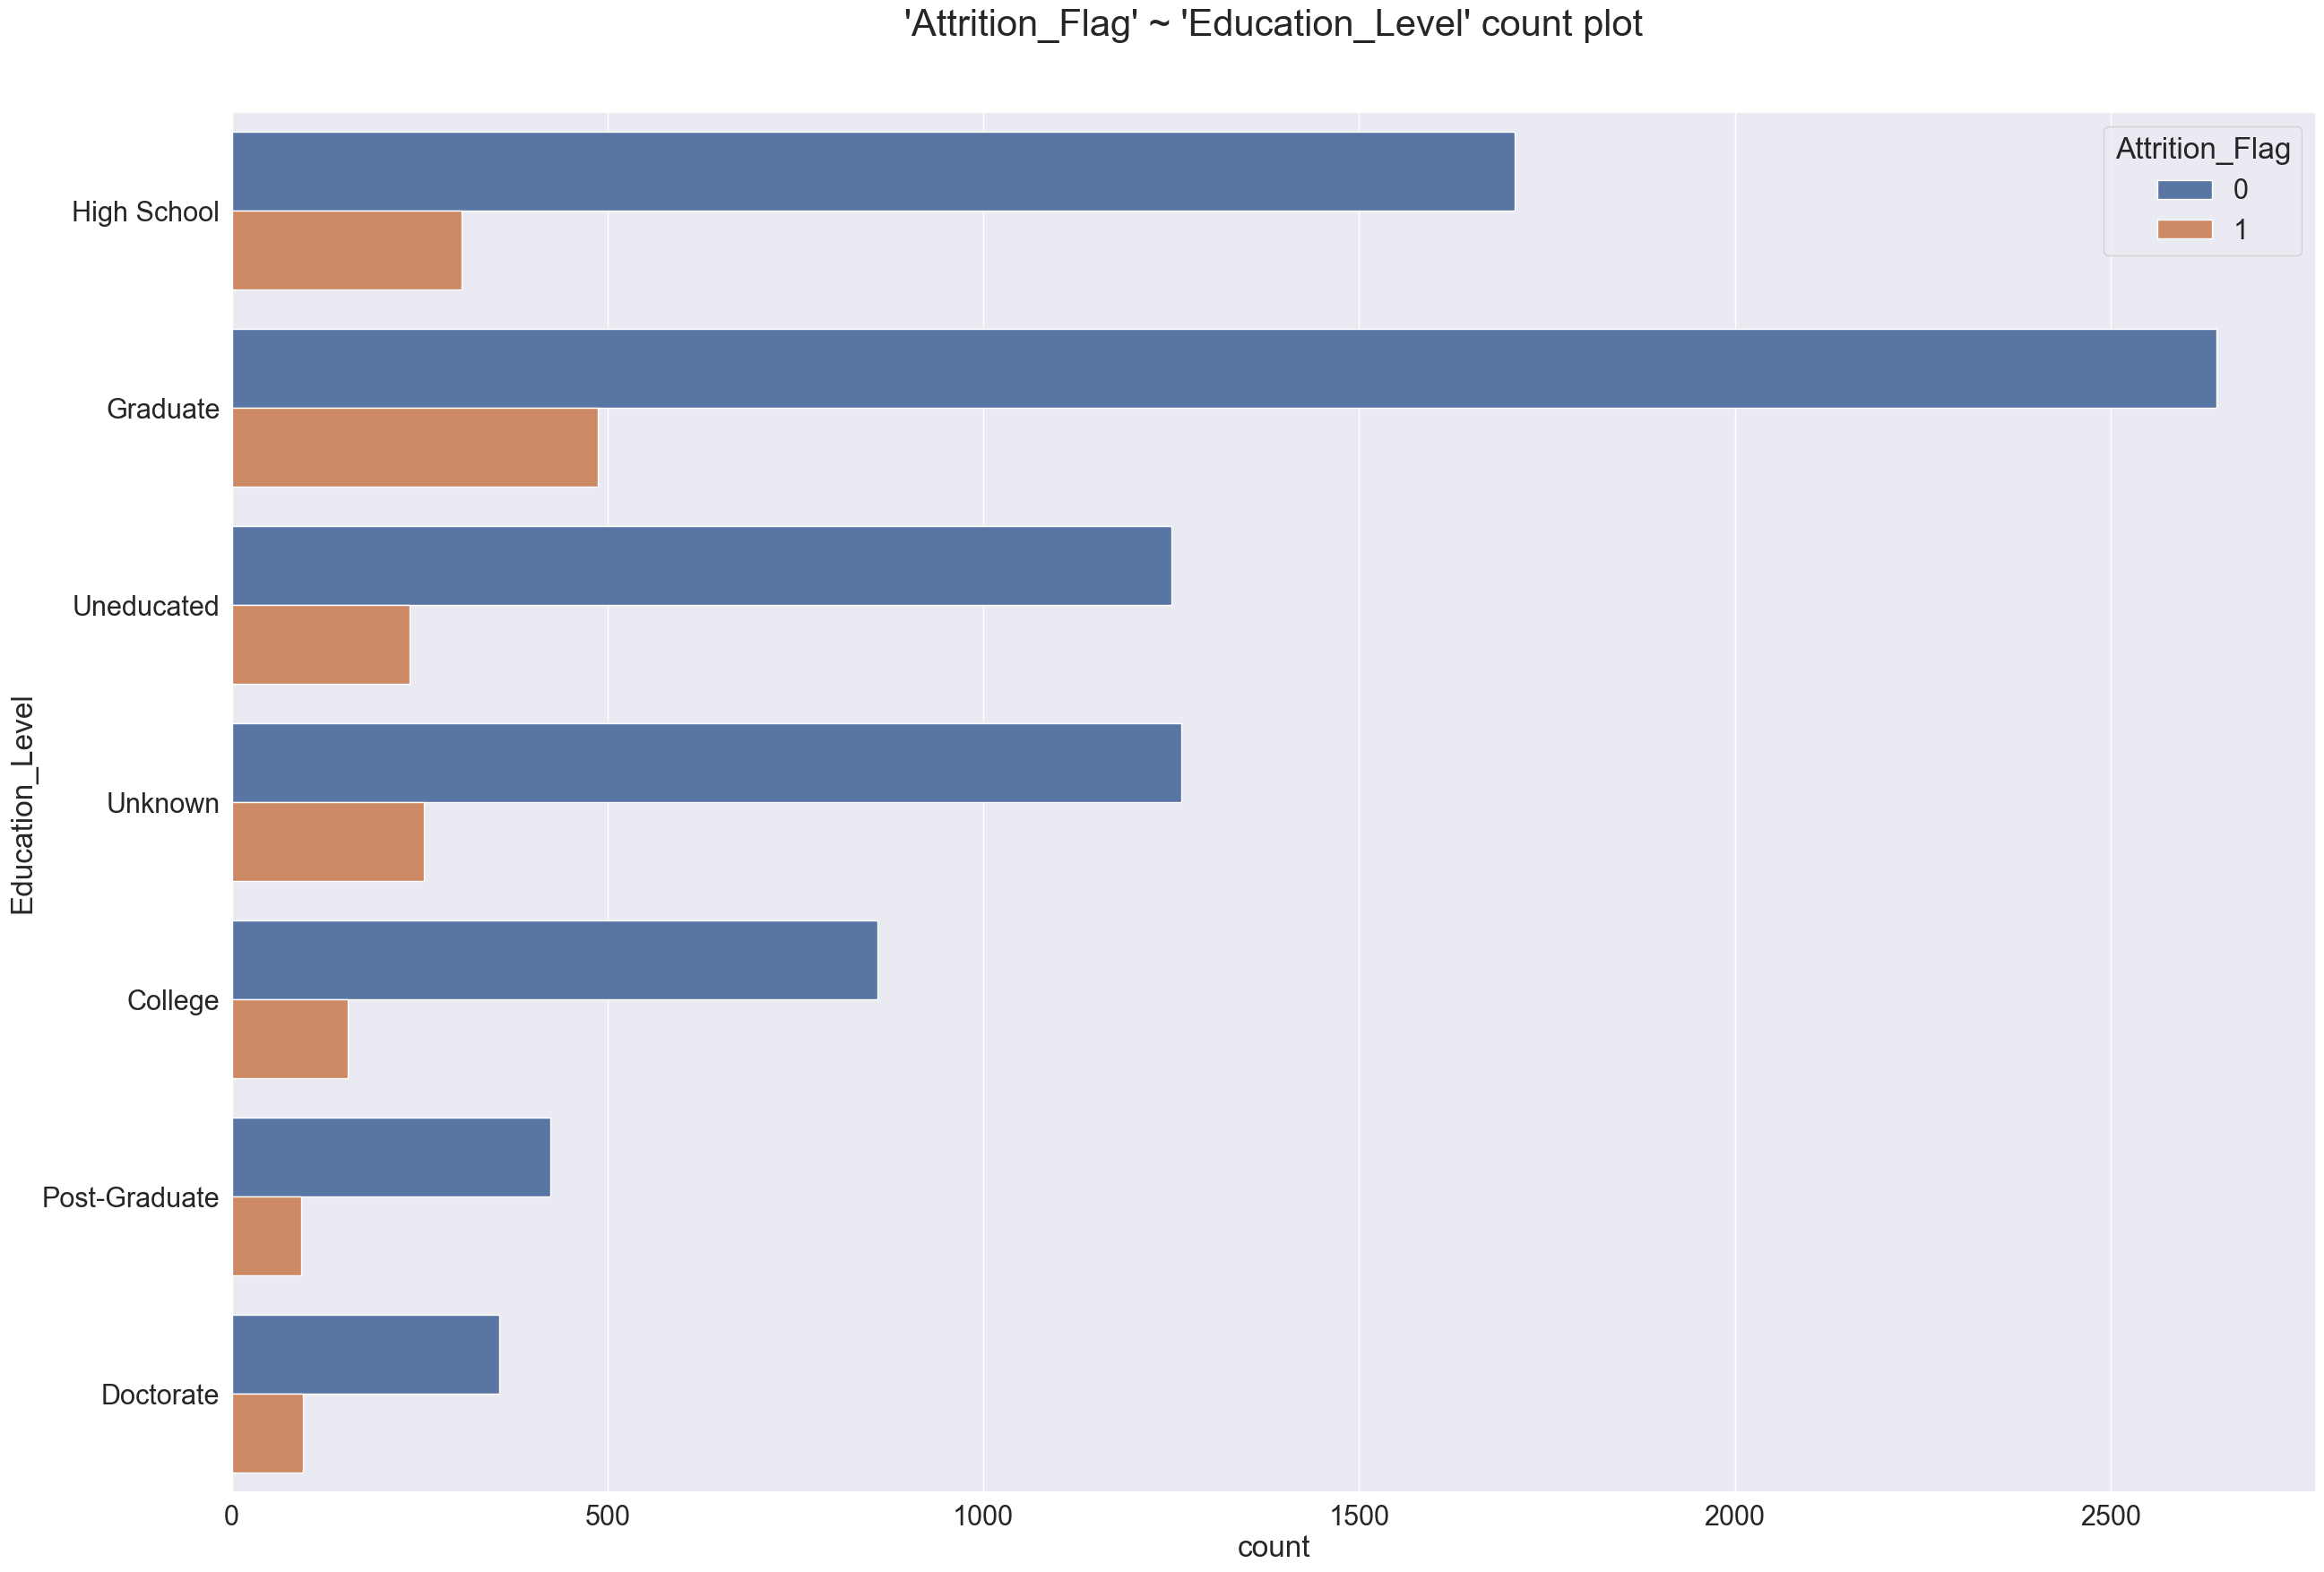

In [54]:
sns.set(font_scale = 2)
plt.figure(figsize=(30, 20))
plt.title("'Attrition_Flag' ~ 'Education_Level' count plot", y=1.05, size=30)
ax = sns.countplot(y="Education_Level", hue='Attrition_Flag', data=df_cat)

'Attrition_Flag' ~ 'Marital_Status' count plot

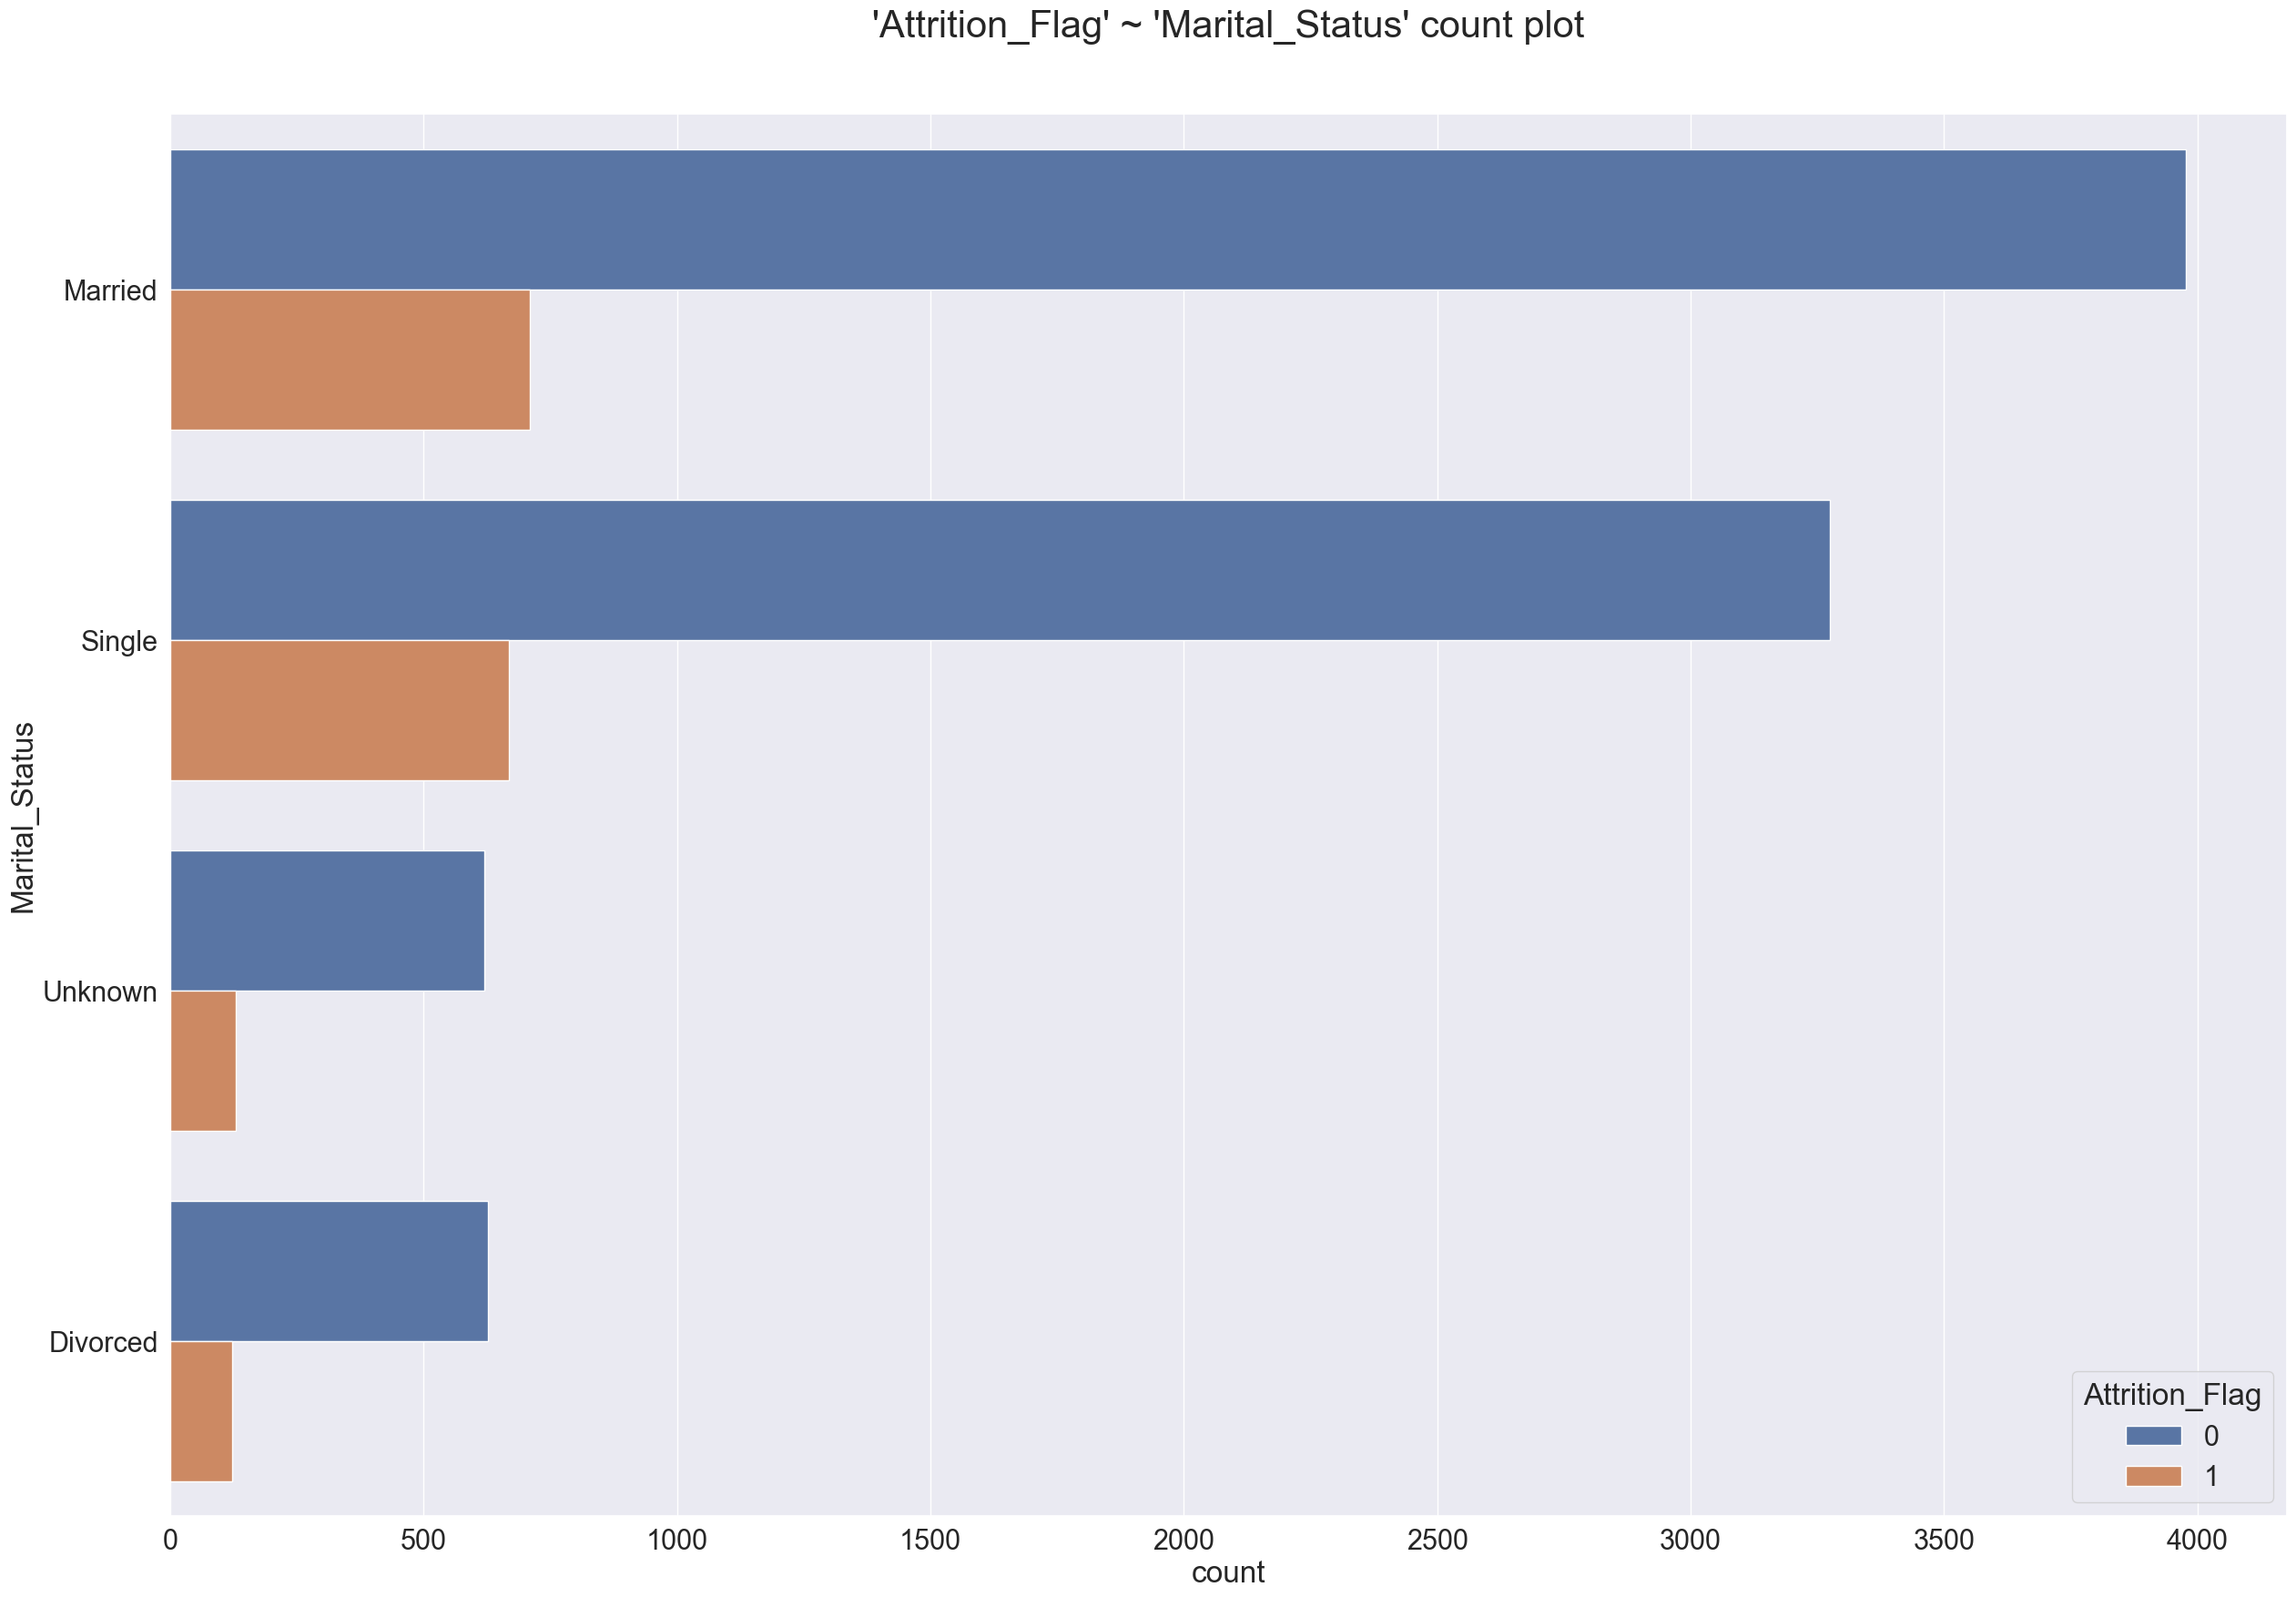

In [55]:
sns.set(font_scale = 2)
plt.figure(figsize=(30, 20))
plt.title("'Attrition_Flag' ~ 'Marital_Status' count plot", y=1.05, size=30)
ax = sns.countplot(y="Marital_Status", hue='Attrition_Flag', data=df_cat)

'Attrition_Flag' ~ 'Income_Category' count plot

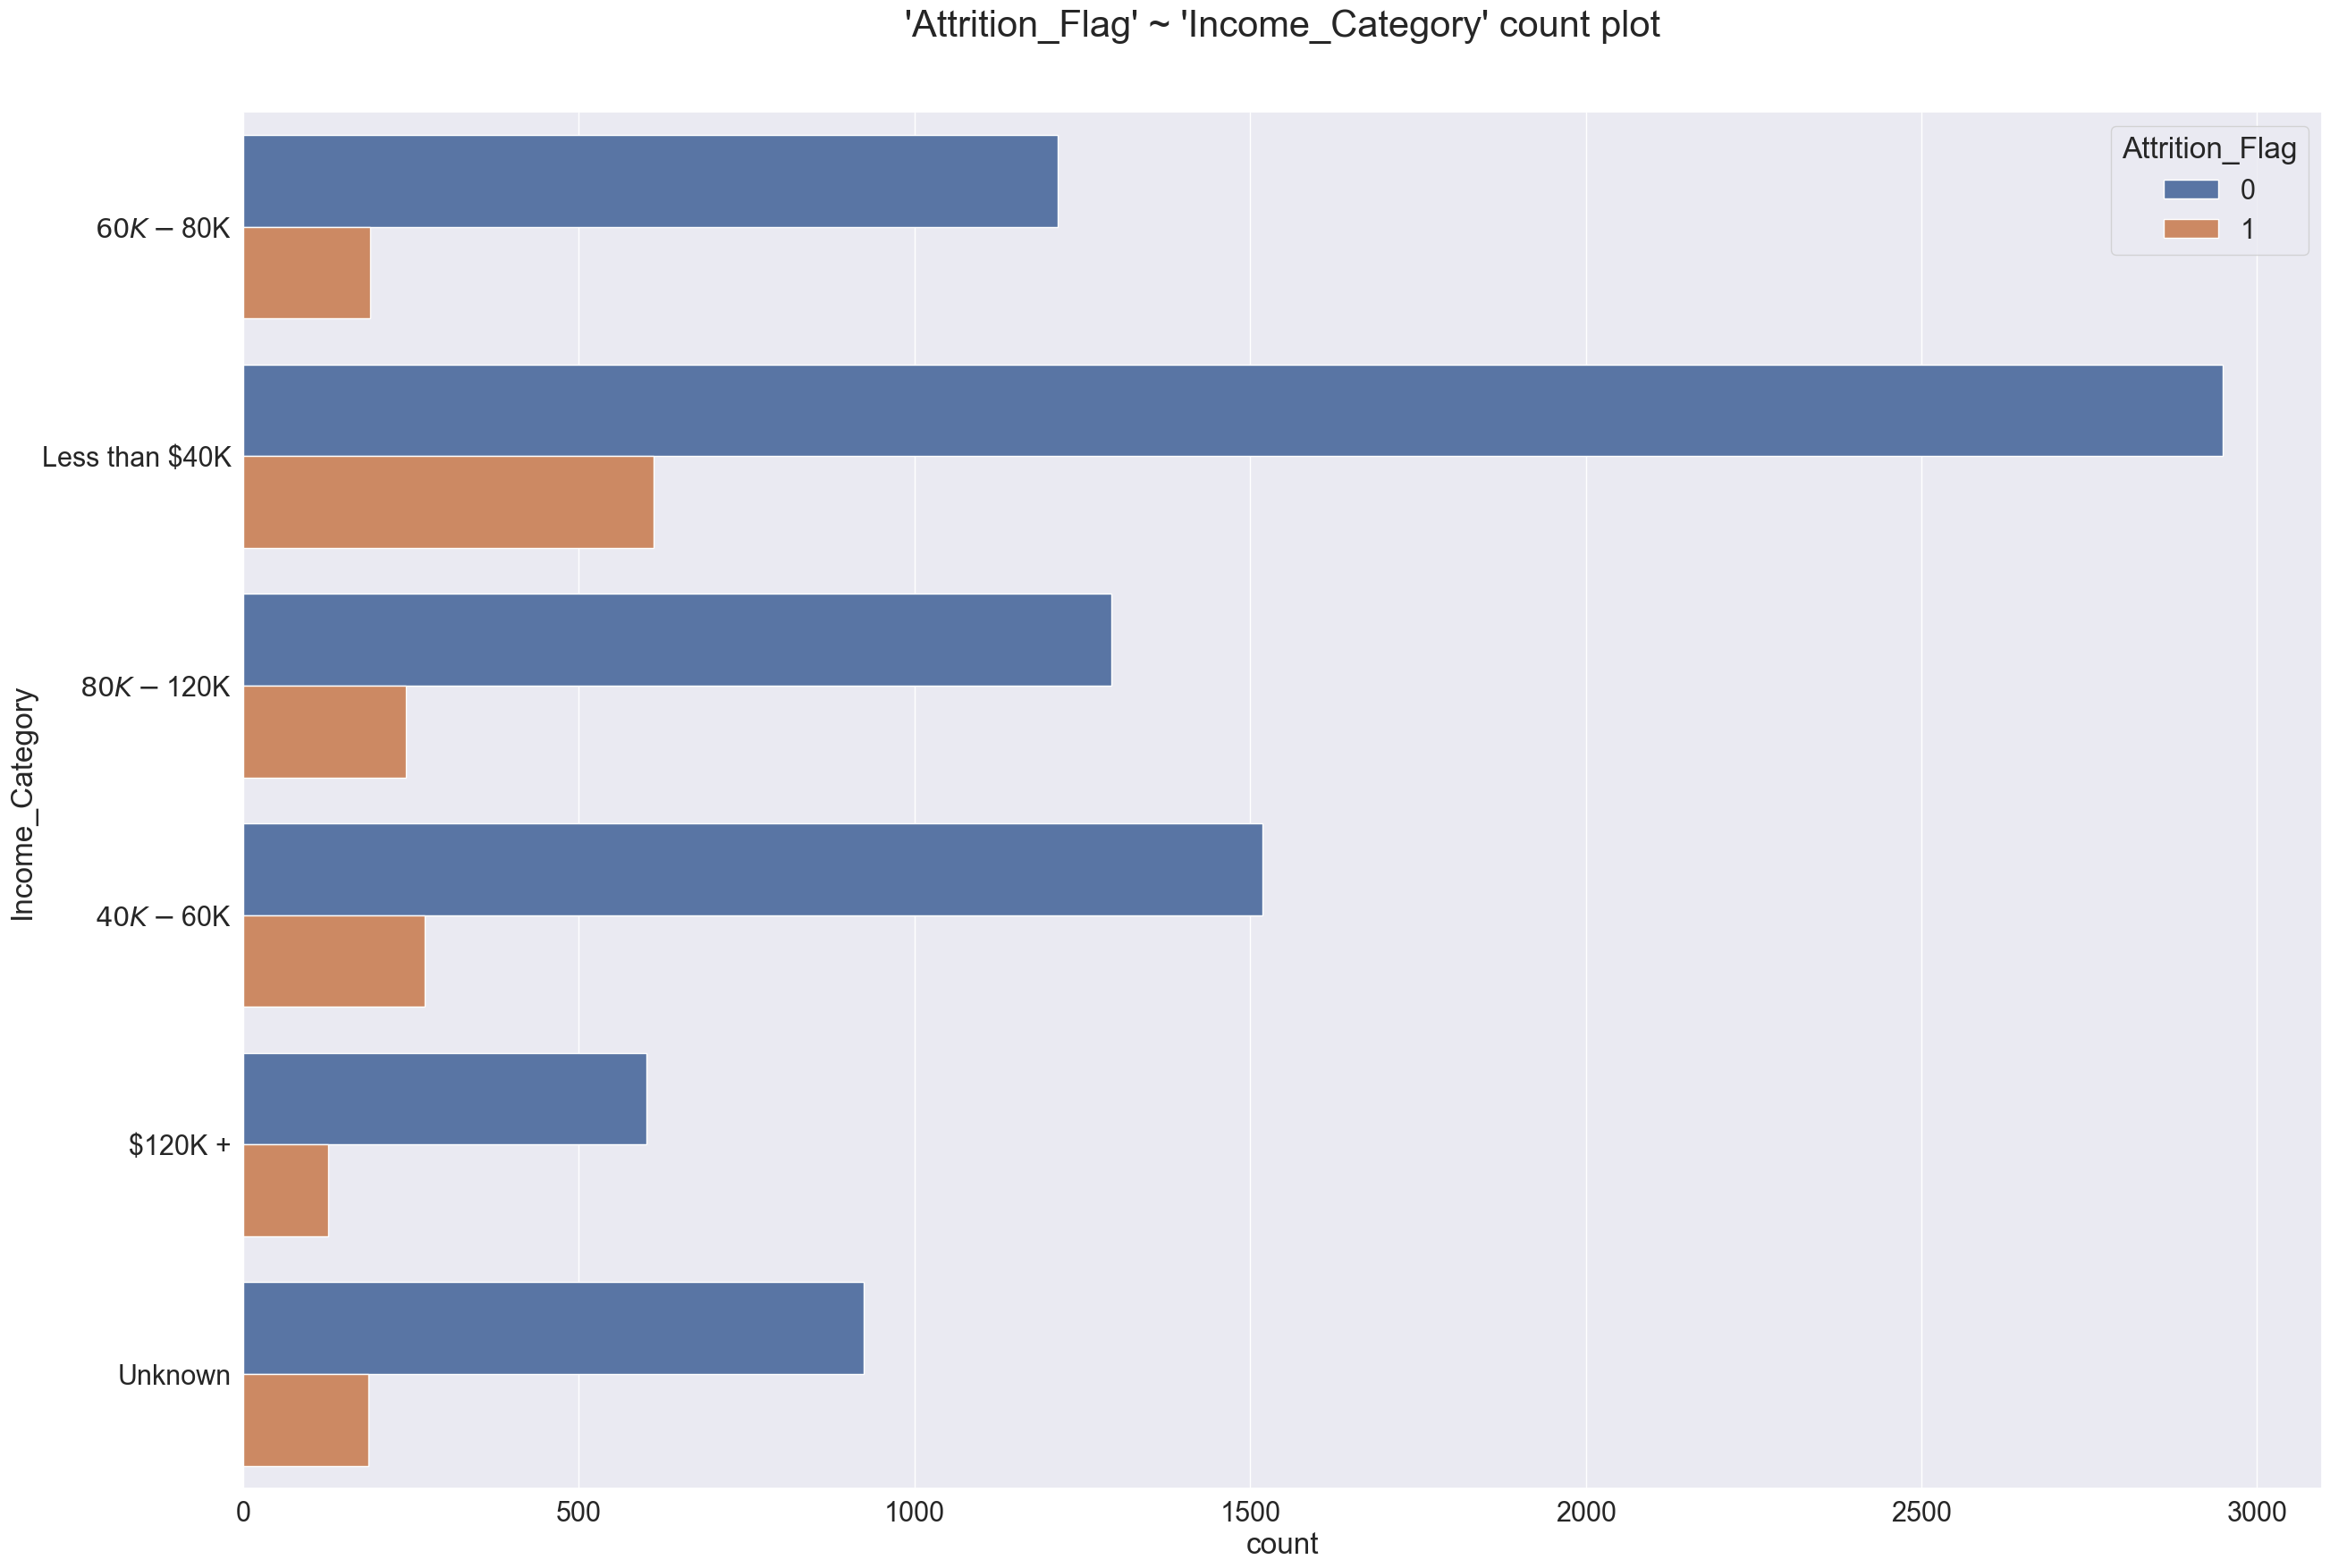

In [56]:
sns.set(font_scale = 2)
plt.figure(figsize=(30, 20))
plt.title("'Attrition_Flag' ~ 'Income_Category' count plot", y=1.05, size=30)
ax = sns.countplot(y="Income_Category", hue='Attrition_Flag', data=df_cat)

'Attrition_Flag' ~ 'Card_Category' count plot

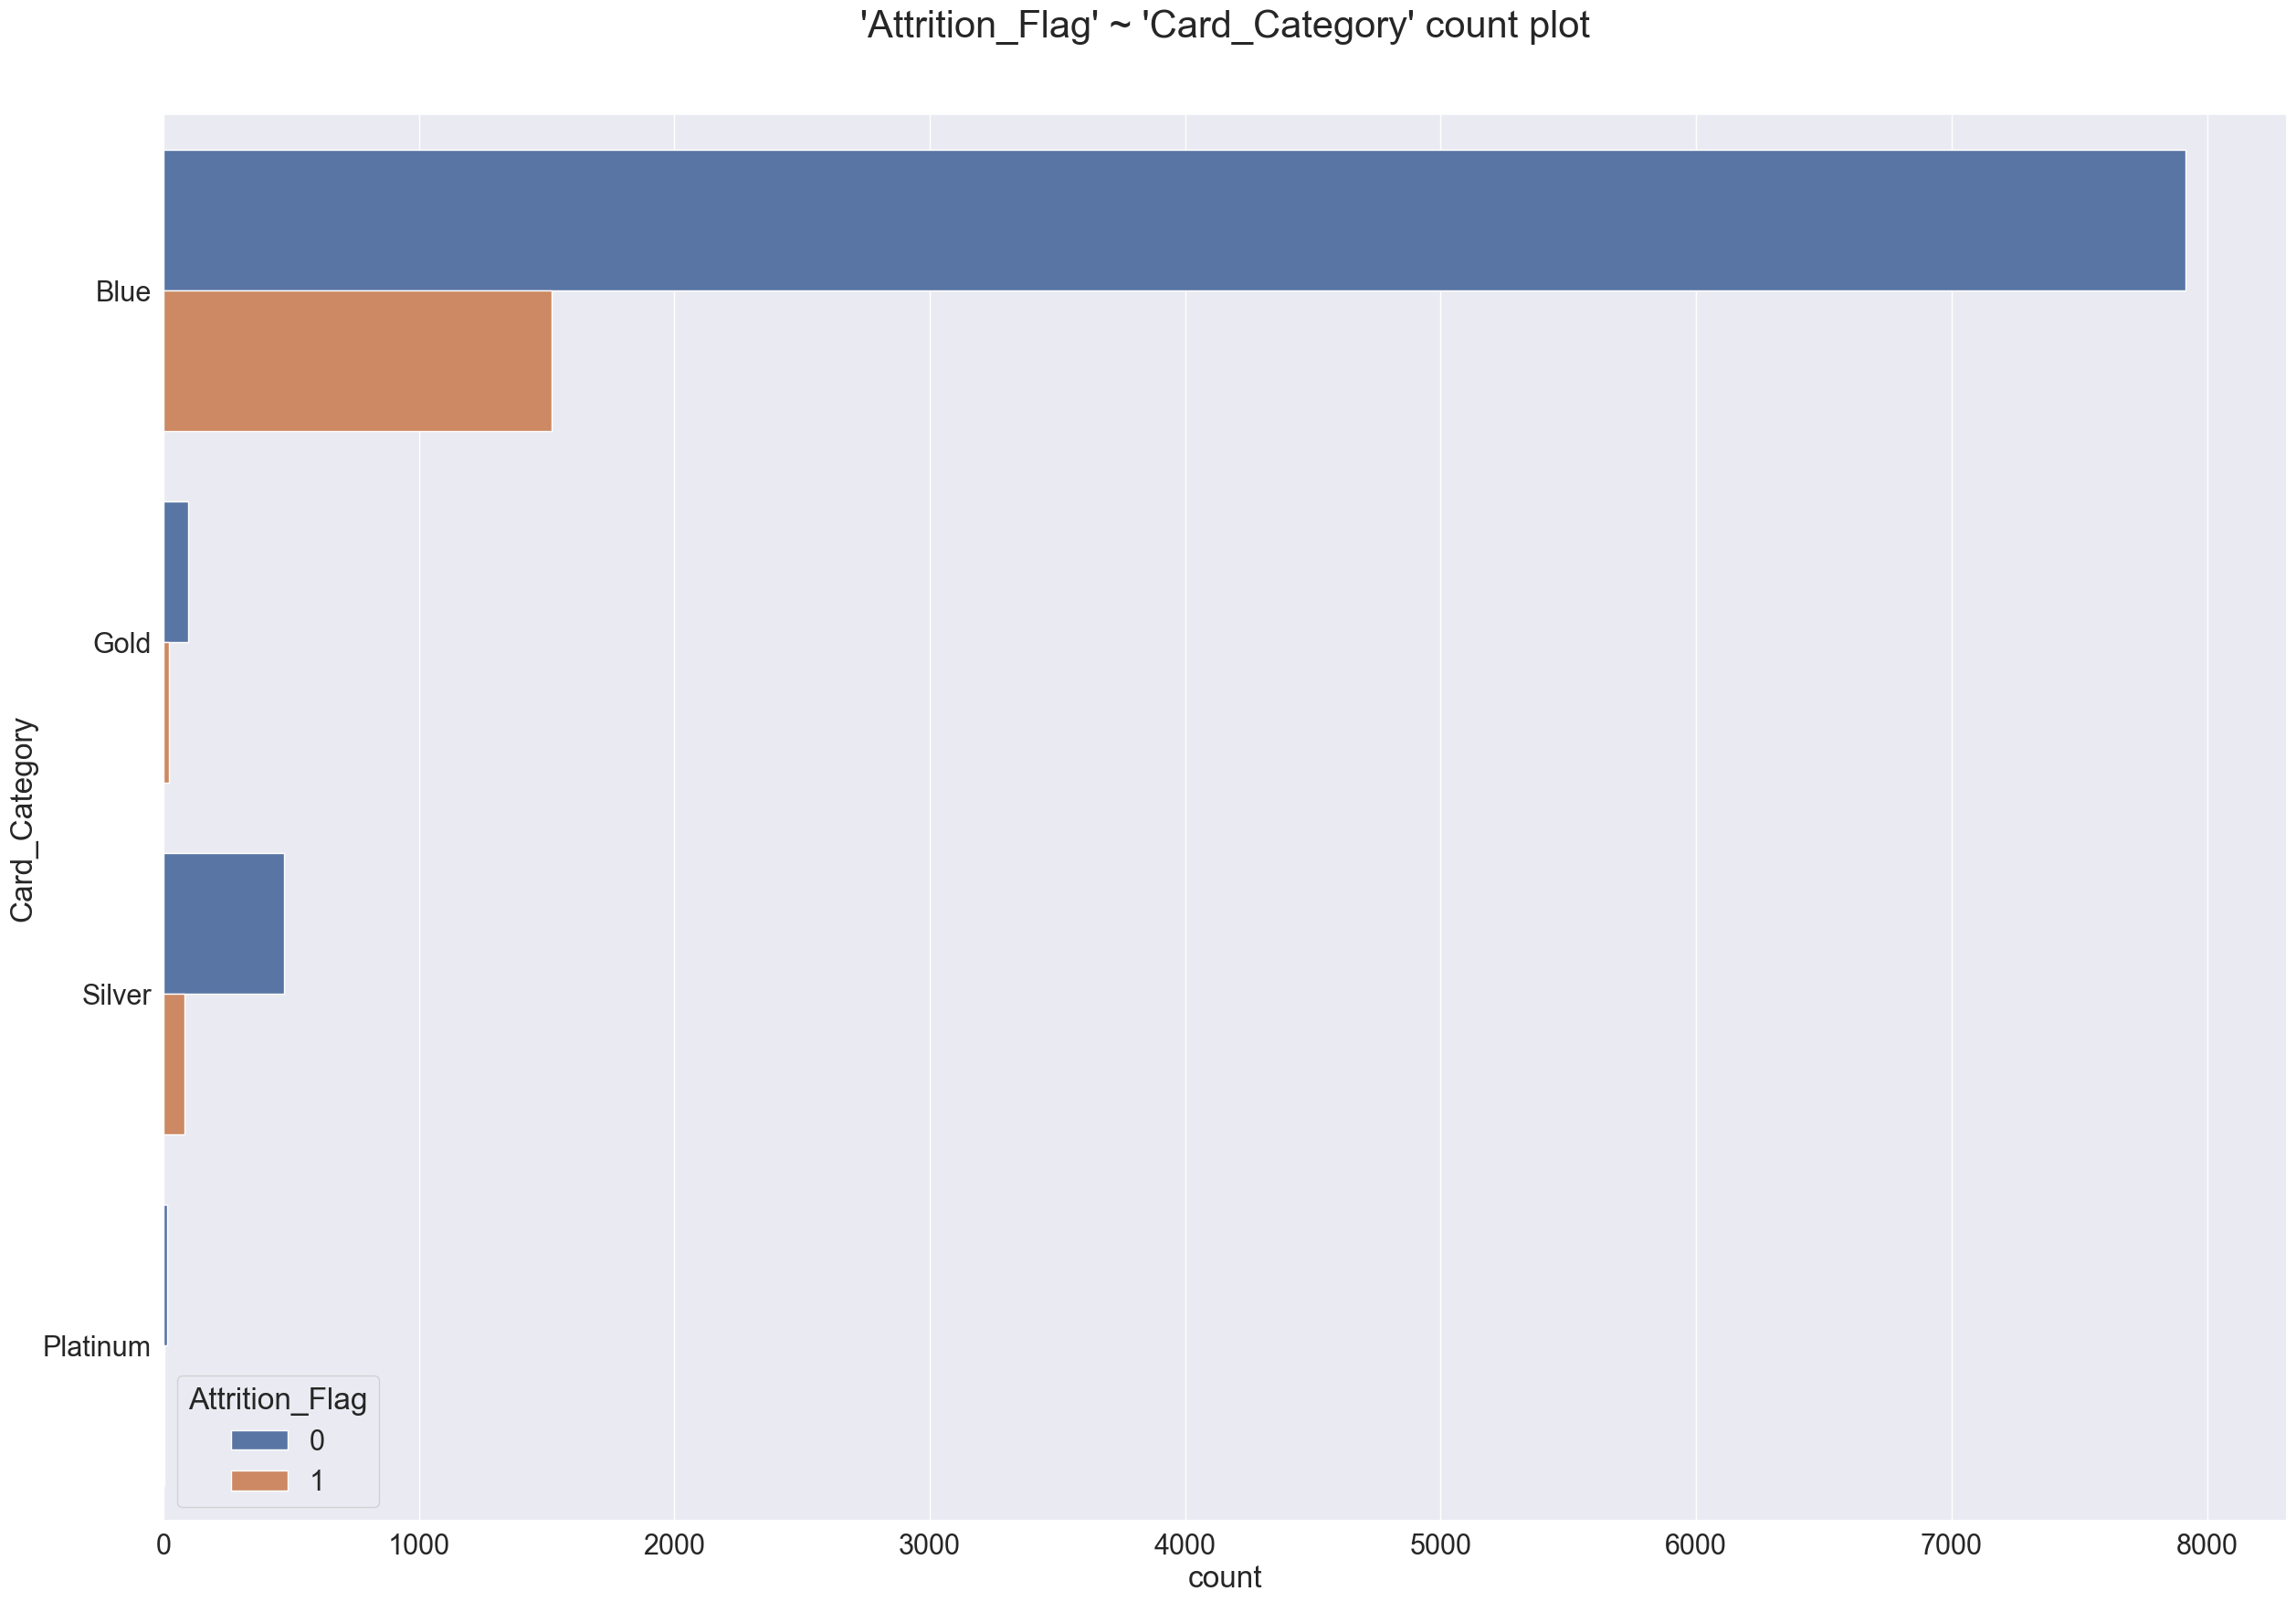

In [57]:
sns.set(font_scale = 2)
plt.figure(figsize=(30, 20))
plt.title("'Attrition_Flag' ~ 'Card_Category' count plot", y=1.05, size=30)
ax = sns.countplot(y="Card_Category", hue='Attrition_Flag', data=df_cat)

### 데이터 전처리


데이터 수정 전 복사 진행


데이터 수정 진행

- Attrition_Flag: {'Attrited Customer':1,'Existing Customer':0}
- Gender: {'F':1,'M':0}
